In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.58'

In [2]:
## Load in Fityk data
df_Fyk=pd.read_excel('Fityk_results.xlsx', sheet_name='112820_FULL') 

In [3]:
df_DF=pd.read_excel('Calibration_fitting.xlsx')
filenames=df_DF['filename_x'].str.replace('_CRR_DiadFit', '')
filenames=filenames.str.replace('-0.04', '')
df_DF['Measurement']=filenames

C:\Users\penny\AppData\Local\Temp\ipykernel_37384\671352331.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  filenames=filenames.str.replace('-0.04', '')


In [4]:
df_DF.head()

,Unnamed: 0.1,Unnamed: 0,Corrected_Splitting,Corr_Split+1σ,Corr_Split-1σ,filename_x,Splitting,Split_err_abs,Split_err_quadrature,Diad1_Combofit_Cent,...,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,Measurement
0,0,0,102.802744,102.811690,102.793798,POC51_CRR_DiadFit,102.740054,0.012279,0.008684,1286.697276,...,29,NaN,60,3,5,"['0h', '3m', '2s']",12:17:28 AM\n,87448,1341,POC51
1,1,0,102.796780,102.807690,102.785870,POC52_CRR_DiadFit,102.734184,0.014892,0.010694,1286.689829,...,29,NaN,90,3,5,"['0h', '4m', '31s']",12:31:31 AM\n,88291,1341,POC52
2,2,0,102.823328,102.826992,102.819664,POC53_CRR_DiadFit,102.760777,0.002978,0.002978,1286.675381,...,29,NaN,90,3,5,"['0h', '4m', '32s']",12:39:13 AM\n,88753,1341,POC53
3,3,0,102.821823,102.830849,102.812797,POC54_CRR_DiadFit,102.759340,0.011323,0.008765,1286.683837,...,29,NaN,90,3,5,"['0h', '4m', '32s']",12:46:57 AM\n,89217,1341,POC54
4,4,0,102.790211,102.804729,102.775693,POC55,102.727821,0.019520,0.014352,1286.707651,...,29,NaN,90,3,5,"['0h', '4m', '32s']",12:54:26 AM\n,89666,1341,POC55


In [5]:
combo=pd.merge(df_Fyk, df_DF, on='Measurement', how='left')

In [6]:
import Thermobar as pt
lowdens=combo['Density  (g/ml)']<0.2
pt.calculate_R2(combo['Density  (g/ml)'].loc[lowdens], combo['Diad1_Combofit_Cent'].loc[lowdens], xy=False, round=False)

{'R2': '1.00000',
 'RMSE': '1286.00000',
 'RMSE_num': 1286.0,
 'P_val': '0.00000',
 'Median': '1287.00000',
 'Mean': '1286.00000',
 'Int': array([1286.70215872]),
 'Grad': array([-6.46029449])}

In [7]:
import Thermobar as pt

pt.calculate_R2(combo['Density  (g/ml)'].loc[lowdens], combo['Diad2_Combofit_Cent'].loc[lowdens], xy=False, round=False)

{'R2': '1.00000',
 'RMSE': '1389.00000',
 'RMSE_num': 1389.0,
 'P_val': '0.00000',
 'Median': '1389.00000',
 'Mean': '1389.00000',
 'Int': array([1389.43576177]),
 'Grad': array([-3.94057052])}

In [8]:
import Thermobar as pt
lowdens=combo['Density  (g/ml)']<0.2
pt.calculate_R2(combo['Density  (g/ml)'].loc[lowdens], combo['Corrected_Splitting'].loc[lowdens], xy=False, round=False)

{'R2': '1.00000',
 'RMSE': '103.00000',
 'RMSE_num': 103.0,
 'P_val': '0.00000',
 'Median': '103.00000',
 'Mean': '103.00000',
 'Int': array([102.79623358]),
 'Grad': array([2.51989393])}

(-0.01, 0.2)

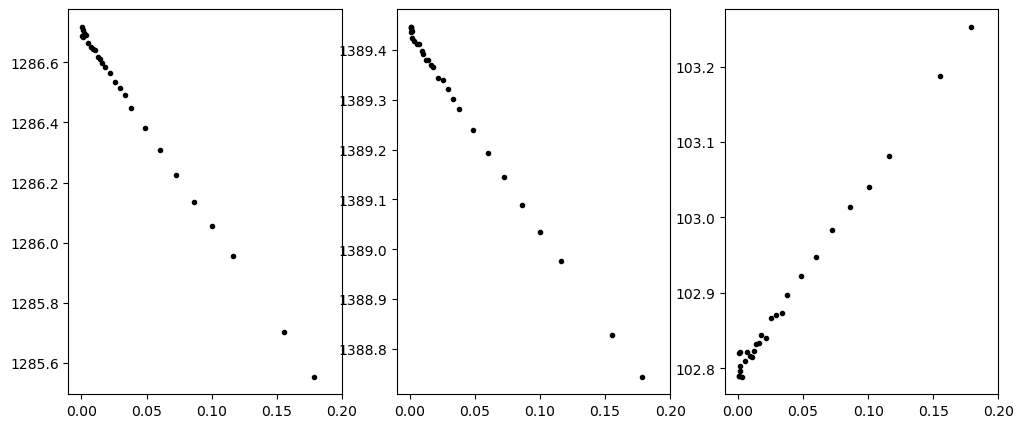

In [9]:
lowdens=combo['Density  (g/ml)']<0.2
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,5), sharex=True)
ax1.plot(combo['Density  (g/ml)'].loc[lowdens], combo['Diad1_Combofit_Cent'].loc[lowdens], '.k')
ax2.plot(combo['Density  (g/ml)'].loc[lowdens], combo['Diad2_Combofit_Cent'].loc[lowdens], '.k')
ax3.plot(combo['Density  (g/ml)'].loc[lowdens], combo['Corrected_Splitting'].loc[lowdens], '.k')
ax1.set_xlim([-0.01, 0.2])

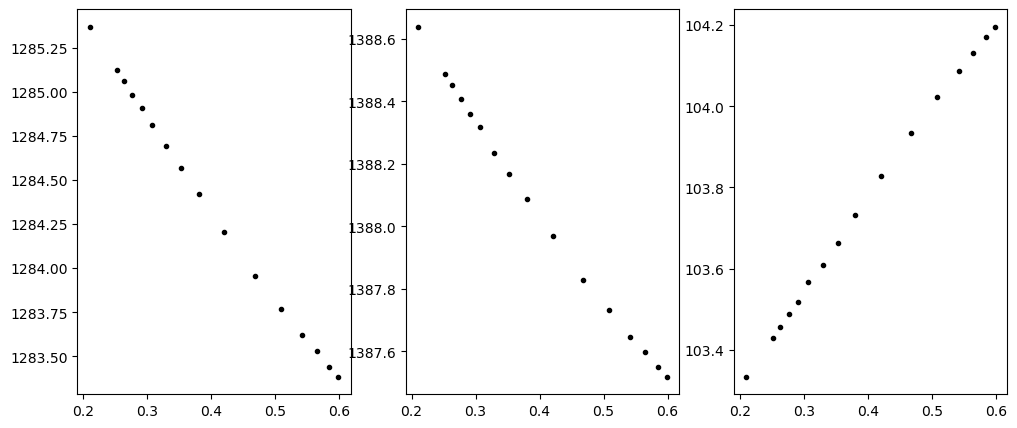

In [10]:
lowdens=combo['Density  (g/ml)'].between(0.2, 0.6)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,5), sharex=True)
ax1.plot(combo['Density  (g/ml)'].loc[lowdens], combo['Diad1_Combofit_Cent'].loc[lowdens], '.k')
ax2.plot(combo['Density  (g/ml)'].loc[lowdens], combo['Diad2_Combofit_Cent'].loc[lowdens], '.k')
ax3.plot(combo['Density  (g/ml)'].loc[lowdens], combo['Corrected_Splitting'].loc[lowdens], '.k')


In [11]:
plt.plot(combo['sec since midnight'], combo['Charlotte_Ne_Factor']-
         combo['Ne_Correction'], 
         'ok')

KeyError: 'Ne_Correction'

In [12]:
combo.columns

Index(['Date', 'time', 'Measurement', '1285cm-1', '1389cm-1',
       '∆CO2 uncorr (cm-1)', '∆CO2 corr (cm-1-Lam)', 'P(Mpa)', 'P(Median-MPa)',
       'P(MAD-MPa)', 'T(ID)', 'T(median)', 'T(mad)', 'Density  (g/ml)',
       '1122cm-1', '1225cm-1', '1453cm-1', '∆Ne-m (cm-1)', '∆Ne-r (cm-1)',
       '1122 r (cm-1)', '1225 r (cm-1)', '1453 r (cm-1)', 'Comments',
       'neon for corr', 'Charlotte_Ne_Factor', 'Unnamed: 0.1', 'Unnamed: 0',
       'Corrected_Splitting', 'Corr_Split+1σ', 'Corr_Split-1σ', 'filename_x',
       'Splitting', 'Split_err_abs', 'Split_err_quadrature',
       'Diad1_Combofit_Cent', 'Diad1_cent_err', 'Diad1_Combofit_Height',
       'Diad1_Voigt_Cent', 'Diad1_Voigt_Area', 'Diad1_Voigt_Sigma',
       'Diad1_Residual', 'Diad1_Prop_Lor', 'Diad1_fwhm', 'Diad1_refit',
       'Diad2_Combofit_Cent', 'Diad2_cent_err', 'Diad2_Combofit_Height',
       'Diad2_Voigt_Cent', 'Diad2_Voigt_Area', 'Diad2_Voigt_Sigma',
       'Diad2_Voigt_Gamma', 'Diad2_Residual', 'Diad2_Prop_Lor', 'Diad2_

Text(0, 0.5, 'DiadFit-Fityk cm-1')

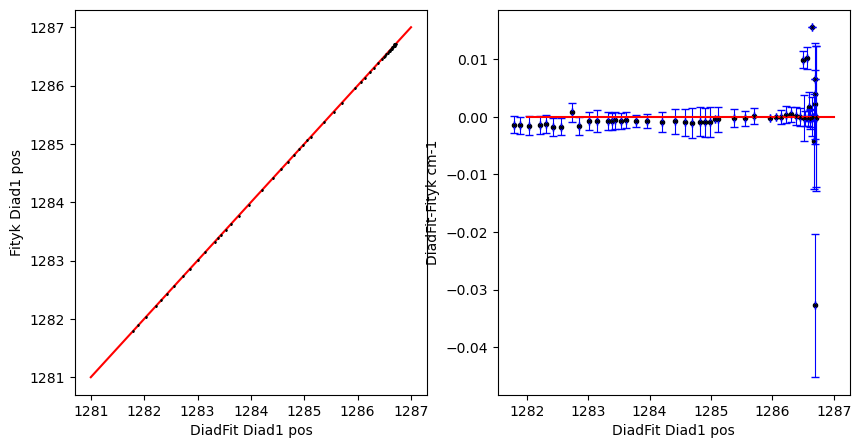

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot([1281, 1287], [1281, 1287], '-r')
#ax1.plot(combo['Diad1_Voigt_Cent'], combo['1285cm-1'],'.k')
ax1.errorbar(x=combo['Diad1_Voigt_Cent'], y=combo['1285cm-1'], xerr=combo['Diad1_cent_err'], yerr=0,
             fmt='d', ecolor='b', elinewidth=0.8, mfc='cyan', ms=1, mec='k')
ax2.plot(combo['Diad1_Voigt_Cent'], combo['Diad1_Voigt_Cent']-combo['1285cm-1'],
               '.k')

ax2.errorbar(combo['Diad1_Voigt_Cent'], combo['Diad1_Voigt_Cent']-combo['1285cm-1'], yerr=combo['Diad1_cent_err'], xerr=0,
             fmt='d', ecolor='b', elinewidth=0.8, mfc='cyan', ms=1, mec='k', capsize=3)
import matplotlib.ticker as ticker
ax2.ticklabel_format(style='plain', axis='y')
ax2.plot([1282, 1287], [0, 0], '-r')
ax1.set_xlabel('DiadFit Diad1 pos')
ax1.set_ylabel('Fityk Diad1 pos')
ax2.set_xlabel('DiadFit Diad1 pos')
ax2.set_ylabel('DiadFit-Fityk cm-1')

Text(0, 0.5, 'DiadFit-Fityk cm-1')

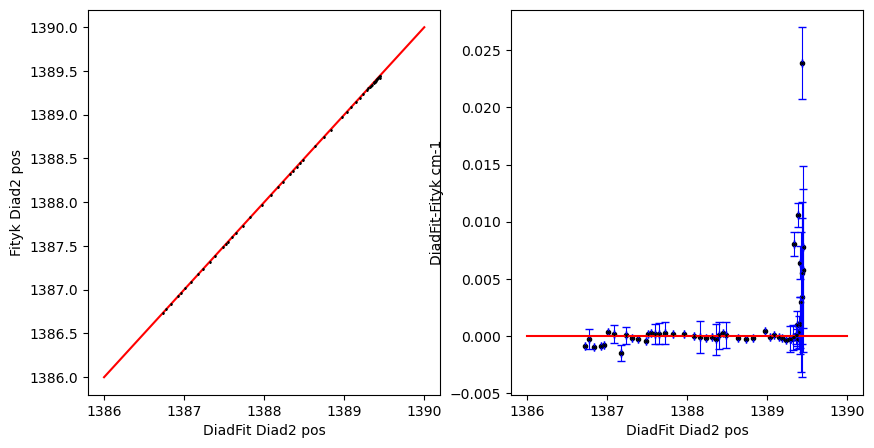

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))


ax1.plot([1386, 1390], [1386, 1390], '-r')
#ax1.plot(combo['Diad2_Voigt_Cent'], combo['1285cm-1'],'.k')
ax1.errorbar(x=combo['Diad2_Voigt_Cent'], y=combo['1389cm-1'], xerr=combo['Diad2_cent_err'], yerr=0,
             fmt='d', ecolor='b', elinewidth=0.8, mfc='cyan', ms=1, mec='k')
ax2.plot(combo['Diad2_Voigt_Cent'], combo['Diad2_Voigt_Cent']-combo['1389cm-1'],
               '.k')

ax2.errorbar(combo['Diad2_Voigt_Cent'], combo['Diad2_Voigt_Cent']-combo['1389cm-1'], yerr=combo['Diad2_cent_err'], xerr=0,
             fmt='d', ecolor='b', elinewidth=0.8, mfc='cyan', ms=1, mec='k', capsize=3)
import matplotlib.ticker as ticker
ax2.ticklabel_format(style='plain', axis='y')
ax2.plot([1386, 1390], [0, 0], '-r')
ax1.set_xlabel('DiadFit Diad2 pos')
ax1.set_ylabel('Fityk Diad2 pos')
ax2.set_xlabel('DiadFit Diad2 pos')
ax2.set_ylabel('DiadFit-Fityk cm-1')

## Splitting (Uncorrected)

<ErrorbarContainer object of 3 artists>

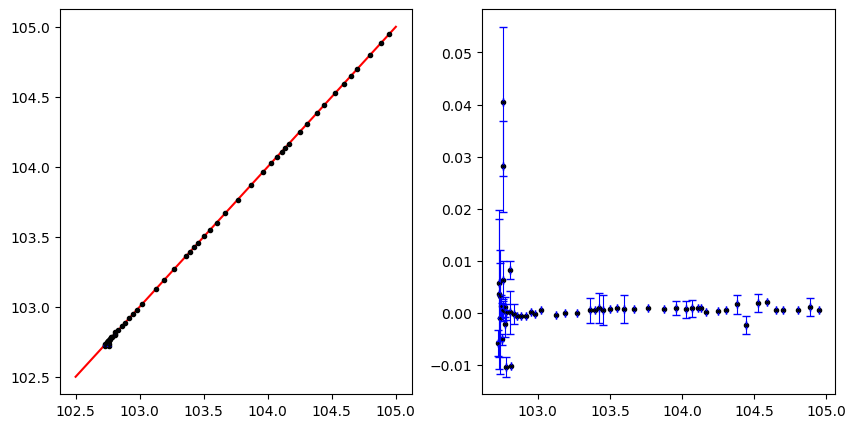

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot([102.5, 105], [102.5, 105], '-r')
ax1.plot(combo['Splitting'], combo['∆CO2 uncorr (cm-1)'],
               '.k')
ax2.plot(combo['Splitting'], combo['Splitting']-combo['∆CO2 uncorr (cm-1)'],
               '.k')

ax1.errorbar(combo['Splitting'], combo['∆CO2 uncorr (cm-1)'], xerr=combo['Split_err_quadrature'], yerr=0,
             fmt='d', ecolor='b', elinewidth=0.8, mfc='cyan', ms=1, mec='k')
ax2.errorbar(combo['Splitting'], combo['Splitting']-combo['∆CO2 uncorr (cm-1)'], 
             xerr=0, yerr=combo['Split_err_quadrature'], 
             fmt='d', ecolor='b', elinewidth=0.8, mfc='cyan', ms=1, mec='k', capsize=3)


## Splitting (Corrected)
- Bigger difference as we use regression of Ne lines vs time, not side-by-side

In [39]:
combo.columns

Index(['Date', 'time', 'Measurement', '1285cm-1', '1389cm-1',
       '∆CO2 uncorr (cm-1)', '∆CO2 corr (cm-1-Lam)', 'P(Mpa)', 'P(Median-MPa)',
       'P(MAD-MPa)', 'T(ID)', 'T(median)', 'T(mad)', 'Density  (g/ml)',
       '1122cm-1', '1225cm-1', '1453cm-1', '∆Ne-m (cm-1)', '∆Ne-r (cm-1)',
       '1122 r (cm-1)', '1225 r (cm-1)', '1453 r (cm-1)', 'Comments',
       'neon for corr', 'Charlotte_Ne_Factor', 'Unnamed: 0.1', 'Unnamed: 0',
       'Corrected_Splitting', 'Corr_Split+1σ', 'Corr_Split-1σ', 'filename_x',
       'Splitting', 'Split_err_abs', 'Split_err_quadrature',
       'Diad1_Combofit_Cent', 'Diad1_cent_err', 'Diad1_Combofit_Height',
       'Diad1_Voigt_Cent', 'Diad1_Voigt_Area', 'Diad1_Voigt_Sigma',
       'Diad1_Residual', 'Diad1_Prop_Lor', 'Diad1_fwhm', 'Diad1_refit',
       'Diad2_Combofit_Cent', 'Diad2_cent_err', 'Diad2_Combofit_Height',
       'Diad2_Voigt_Cent', 'Diad2_Voigt_Area', 'Diad2_Voigt_Sigma',
       'Diad2_Voigt_Gamma', 'Diad2_Residual', 'Diad2_Prop_Lor', 'Diad2_

<ErrorbarContainer object of 3 artists>

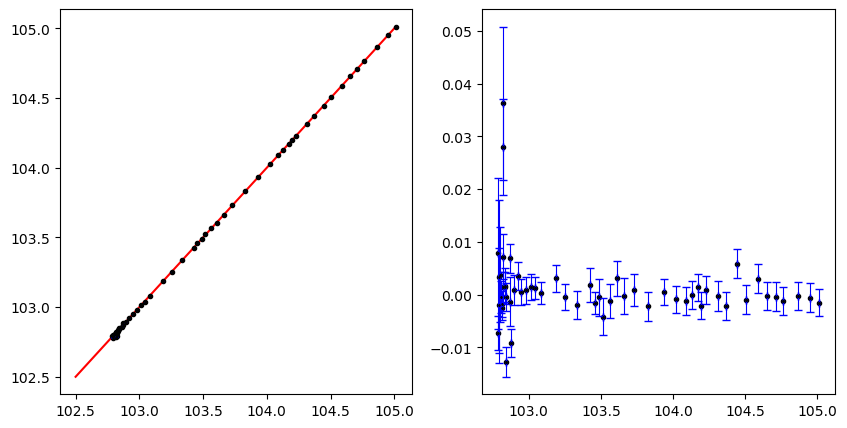

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot([102.5, 105], [102.5, 105], '-r')
ax1.plot(combo['Corrected_Splitting'], combo['∆CO2 corr (cm-1-Lam)'],
               '.k')
ax2.plot(combo['Corrected_Splitting'], combo['Corrected_Splitting']-combo['∆CO2 corr (cm-1-Lam)'],
               '.k')

ax1.errorbar(combo['Corrected_Splitting'], combo['∆CO2 corr (cm-1-Lam)'], xerr=combo['Corrected_Splitting']-combo['Corr_Split+1σ'], yerr=0,
             fmt='d', ecolor='b', elinewidth=0.8, mfc='cyan', ms=1, mec='k')
ax2.errorbar(combo['Corrected_Splitting'], combo['Corrected_Splitting']-combo['∆CO2 corr (cm-1-Lam)'], 
             xerr=0, yerr=combo['Corrected_Splitting']-combo['Corr_Split+1σ'], 
             fmt='d', ecolor='b', elinewidth=0.8, mfc='cyan', ms=1, mec='k', capsize=3)

In [46]:
a=combo['Diad2_Combofit_Height']/combo['Diad1_Combofit_Height']
a.to_clipboard(excel=True)

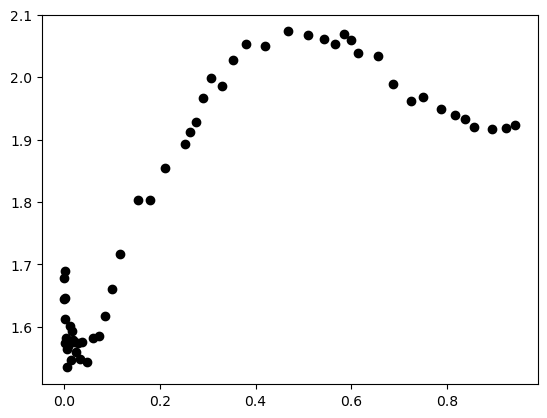

In [44]:
plt.plot(combo['Density  (g/ml)'],
    combo['Diad2_Combofit_Height']/combo['Diad1_Combofit_Height'], 'ok')

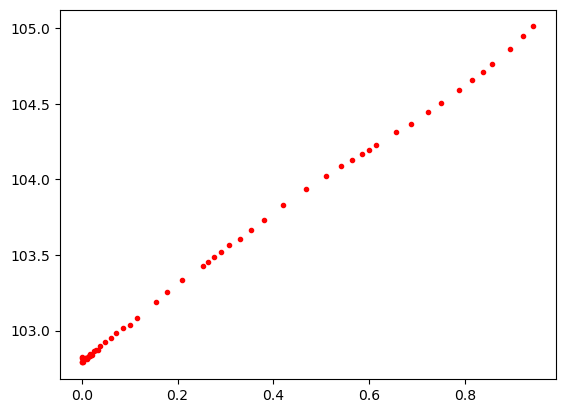

In [ ]:
plt.plot(combo['Density  (g/ml)'], combo['Corrected_Splitting'],
               '.r')

In [ ]:
combo.loc[combo['Density  (g/ml)']>0.75]

,Date,time,Measurement,1285cm-1,1389cm-1,∆CO2 uncorr (cm-1),∆CO2 corr (cm-1-Lam),P(Mpa),P(Median-MPa),P(MAD-MPa),...,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,Ne_Correction
0,2020-11-28,17:52:07,POC1,1281.7841,1386.7315,104.9474,105.011502,34.251,34.253304,0.000696,...,28,NaN,10,5,5,"['0h', '0m', '52s']",5:52:07 PM\n,64327,1341,1.000599
1,2020-11-28,18:04:56,POC2,1281.8904,1386.7760,104.8856,104.949506,30.100,30.102432,0.000654,...,28,NaN,15,5,5,"['0h', '1m', '17s']",6:04:56 PM\n,65096,1341,1.000599
2,2020-11-28,18:12:40,POC3,1282.0383,1386.8396,104.8013,104.864202,25.090,25.098817,0.001313,...,28,NaN,15,5,5,"['0h', '1m', '17s']",6:12:40 PM\n,65560,1341,1.000599
3,2020-11-28,18:17:17,POC4,1282.2229,1386.9228,104.6999,104.763597,20.100,20.119464,0.000659,...,28,NaN,15,5,5,"['0h', '1m', '17s']",6:17:17 PM\n,65837,1341,1.000599
4,2020-11-28,18:22:17,POC5,1282.3161,1386.9649,104.6488,104.711737,18.060,18.052581,0.000744,...,28,NaN,15,5,5,"['0h', '1m', '17s']",6:22:17 PM\n,66137,1341,1.000599
5,2020-11-28,18:26:42,POC6,1282.4242,1387.0150,104.5908,104.655096,16.050,16.055856,0.000487,...,28,NaN,15,5,5,"['0h', '1m', '17s']",6:26:42 PM\n,66402,1341,1.000599
6,2020-11-28,18:30:47,POC7,1282.5583,1387.0847,104.5264,104.587332,14.050,14.057654,0.001270,...,28,NaN,15,5,5,"['0h', '1m', '17s']",6:30:47 PM\n,66647,1341,1.000598


(-0.01, 0.1)

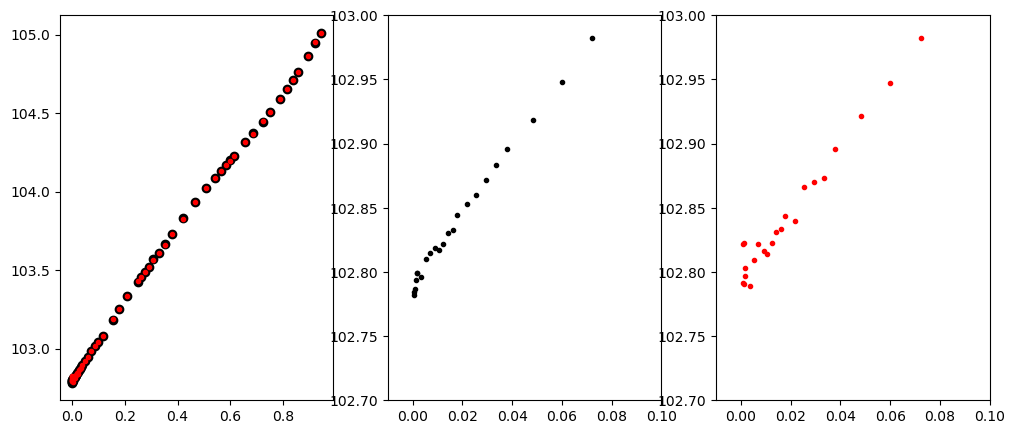

In [ ]:
## Regression of Pressure vs. splitting
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,5))
#ax1.plot([102.5, 105], [102.5, 105], '-r')
ax1.plot(combo['Density  (g/ml)'], combo['∆CO2 corr (cm-1-Lam)'],
               'ok')
ax1.plot(combo['Density  (g/ml)'], combo['Corrected_Splitting'],
               '.r')

ax2.plot(combo['Density  (g/ml)'], combo['∆CO2 corr (cm-1-Lam)'],
               '.k')
ax3.plot(combo['Density  (g/ml)'], combo['Corrected_Splitting'],
               '.r')
ax2.set_ylim([102.7, 103])
ax2.set_xlim([-0.01, 0.1])
ax3.set_ylim([102.7, 103])
ax3.set_xlim([-0.01, 0.1])

In [ ]:
combo.loc[(combo['Corrected_Splitting']-combo['∆CO2 corr (cm-1-Lam)'])<-0.005]

,Date,time,Measurement,1285cm-1,1389cm-1,∆CO2 uncorr (cm-1),∆CO2 corr (cm-1-Lam),P(Mpa),P(Median-MPa),P(MAD-MPa),...,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,Ne_Correction
37,2020-11-28,22:31:51,POC38,1286.4811,1389.3024,102.8213,102.883013,1.79,1.797662,0.000534,...,28,NaN,45,3,5,"['0h', '2m', '16s']",10:31:51 PM\n,81111,1341,1.000605
40,2020-11-28,22:54:43,POC41,1286.5554,1389.3430,102.7876,102.852812,1.20,1.201548,0.000342,...,28,NaN,45,3,5,"['0h', '2m', '16s']",10:54:43 PM\n,82483,1341,1.000606
49,2020-11-29,1900-01-01 00:09:49,POC50,1286.6844,1389.4162,102.7318,102.796105,0.20,0.200760,0.000307,...,29,NaN,45,5,5,"['0h', '3m', '46s']",12:09:42 AM\n,86982,1341,1.000611
